In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad = pd.DataFrame({'watched':[5,4,4,6,8], 'bought':[8,9,10,13,15]})

In [3]:
ad

,watched,bought
0,5,8
1,4,9
2,4,10
3,6,13
4,8,15


In [4]:
ad.describe()

,watched,bought
count,5.00000,5.000000
mean,5.40000,11.000000
std,1.67332,2.915476
min,4.00000,8.000000
25%,4.00000,9.000000
50%,5.00000,10.000000
75%,6.00000,13.000000
max,8.00000,15.000000


In [5]:
ad.corr()

,watched,bought
watched,1.000000,0.871165
bought,0.871165,1.000000


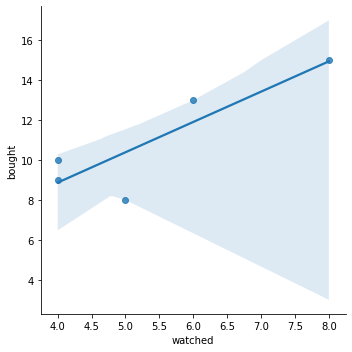

In [6]:
sns.lmplot('watched', 'bought', data=ad)

## Cross Product Deviations

####  When we multiply the deviations of one variable by the corresponding deviations of a second variable, we get what is known as  the cross-product deviations.

### Covariance

####     As  with  the  variance,  if  we  want  an  average  value  of  the combined deviations for the two variables, we must divide by the number of observations (we actually divide by N −1). This aver-aged sum of combined deviations is known as the covariance

In [7]:
# for above examples Cross Product Deviations
watched_diff, bought_diff = [], []
for index, row in ad.iterrows():
    watched_diff.append(5.4-row['watched'])
    bought_diff.append(11-row['bought'])

In [8]:
print(watched_diff, bought_diff)

[0.40000000000000036, 1.4000000000000004, 1.4000000000000004, -0.5999999999999996, -2.5999999999999996] [3, 2, 1, -2, -4]


In [9]:
Cross_Product_Deviatiions = sum(np.multiply(watched_diff, bought_diff))
Cross_Product_Deviatiions

17.0

In [10]:
Covariance = Cross_Product_Deviatiions/(5-1)
Covariance

4.25

In [11]:
combined_matrix = np.stack((ad['watched'], ad['bought']), axis=0)

In [12]:
combined_matrix

array([[ 5,  4,  4,  6,  8],
       [ 8,  9, 10, 13, 15]])

In [13]:
np.cov(combined_matrix)

array([[2.8 , 4.25],
       [4.25, 8.5 ]])

In [14]:
np.corrcoef(combined_matrix)

array([[1.        , 0.87116507],
       [0.87116507, 1.        ]])

In [15]:
watched_diff_standarized = np.array(watched_diff)/(ad['watched'].std())
bought_diff_standarized = np.array(bought_diff)/(ad['bought'].std())


In [16]:
watched_diff_standarized


array([ 0.23904572,  0.83666003,  0.83666003, -0.35856858, -1.55379719])

In [17]:
bought_diff_standarized

array([ 1.02899151,  0.68599434,  0.34299717, -0.68599434, -1.37198868])

In [18]:
Cross_Product_Deviatiions_standarized = sum(np.multiply(watched_diff_standarized, bought_diff_standarized))
Cross_Product_Deviatiions_standarized

3.484660262185848

In [19]:
cov_standarized = Cross_Product_Deviatiions_standarized/(5-1)
cov_standarized

0.871165065546462

### The standardized covariance is known as a correlation coefficient , The coefficient above is known as the Pearson product-moment correlation coefficient or Pearson correlation coefficient

r = covariance/(s1*s2)

In [20]:
corr_coeff=Covariance/((ad['watched'].std())*(ad['bought'].std()))
corr_coeff

0.871165065546462

In [21]:
# by using library
r = ad['watched'].corr(ad['bought'])
r

0.8711650655464619

 ### The significance of the correlation coefficient

In [22]:
Z_r = 0.5*np.log((1+r)/(1-r))     # or use np.arctanh(r)
Z_r

1.3378922692134374

In [23]:
N = 5

In [24]:
SE_zr = 1/np.sqrt(N-3)
SE_zr

0.7071067811865475

 Normally we want to see whether the correlation is different from 0, in which case we can subtract 0 from the observed value of r and divide by the standard error (in other words, we just divide Zr by its standard error)

In [25]:
Z = (Z_r - 0)/SE_zr
Z

1.8920653921157593

###    Confidence intervals for r

In [26]:
lower_boundary_confidence_int = Z_r - 1.96*(SE_zr)
upper_boundary_confidence_int = Z_r + 1.96*(SE_zr)

In [27]:
lower_boundary_r = (np.exp(2*lower_boundary_confidence_int)-1)/(np.exp(2*lower_boundary_confidence_int)+1)
lower_boundary_r

-0.04800010662116143

In [28]:
upper_boundary_r = (np.exp(2*upper_boundary_confidence_int)-1)/(np.exp(2*upper_boundary_confidence_int)+1)     
upper_boundary_r

0.99142404684011

In [29]:
# or use np.tanh((lcb,ucb))

###     A word of warning about interpretation: causality

i)The third-variable problem


ii)Direction  of  causality

###  A)   Bivariate correlations

In [30]:
data = pd.read_csv('/home/atrides/Desktop/More_Stats/Exam Anxiety.csv')

In [31]:
data.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male


In [32]:
data.set_index('Code', inplace=True, drop=True)

In [33]:
data.corr()

,Revise,Exam,Anxiety
Revise,1.000000,0.396721,-0.709249
Exam,0.396721,1.000000,-0.440993
Anxiety,-0.709249,-0.440993,1.000000


In [34]:
st.pearsonr(data['Revise'], data['Exam'])

(0.3967206969267568, 3.3434511480537075e-05)

In [35]:
st.spearmanr(data['Revise'], data['Exam'])

SpearmanrResult(correlation=0.34989478093526827, pvalue=0.0002912864258449831)

In [36]:
st.kendalltau(data['Revise'], data['Exam'])

KendalltauResult(correlation=0.26332585349238524, pvalue=0.00014270086676695348)

In [37]:
st.pearsonr(data['Anxiety'], data['Exam'])

(-0.4409934116087886, 3.1278727730079265e-06)

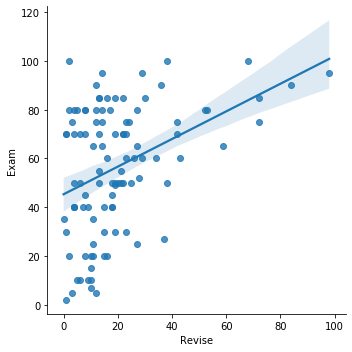

In [38]:
sns.lmplot('Revise', 'Exam', data=data)

In [39]:
data.corr(method='spearman')

,Revise,Exam,Anxiety
Revise,1.000000,0.349895,-0.621969
Exam,0.349895,1.000000,-0.404614
Anxiety,-0.621969,-0.404614,1.000000


In [40]:
data.corr(method='kendall')

,Revise,Exam,Anxiety
Revise,1.000000,0.263326,-0.488560
Exam,0.263326,1.000000,-0.284792
Anxiety,-0.488560,-0.284792,1.000000


In [41]:
r = data['Exam'].corr(data['Anxiety'])
r

-0.44099341160878863

In [42]:
r_z = np.arctanh(r)
r_z

-0.4734633823880143

In [43]:
N = len(data)

In [44]:
se = np.sqrt(1/(N-3))
se

0.1

In [45]:
lcb = r_z - 1.96*se
ucb = r_z + 1.96*se
(lcb,ucb)

(-0.6694633823880143, -0.27746338238801427)

In [46]:
lo, hi = np.tanh((lcb,ucb))
(lo,hi)

(-0.584626785793844, -0.27055576179444507)

### Using R^2, coeffecient of determination(R squared) for interpretation

#### The  correlation  coefficient squared (known as the coefficient of determination, R^2) is a measure of the amount of variability in one variable that is shared by the other. 

In [47]:
(data.corr())**2

,Revise,Exam,Anxiety
Revise,1.000000,0.157387,0.503035
Exam,0.157387,1.000000,0.194475
Anxiety,0.503035,0.194475,1.000000


### Spearman's correlation coefficient

Spearman’s correlation coefficient (Spearman, 1910), rs, is a non-parametric statis-tic and so can be used when the data have violated parametric assumptions such as non-normally distributed data 

In [48]:
df = pd.read_csv('/home/atrides/Desktop/More_Stats/TheBiggestLiar.csv')

In [49]:
df.head()

,Creativity,Position,Novice
0,53,1,0
1,36,3,1
2,31,4,0
3,43,2,0
4,30,4,1


In [50]:
(df.corr(method='spearman'))

,Creativity,Position,Novice
Creativity,1.000000,-0.373218,-0.266415
Position,-0.373218,1.000000,0.108678
Novice,-0.266415,0.108678,1.000000


In [51]:
model = sm.OLS.from_formula("Exam~ Revise", data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     18.87
Date:                Fri, 22 May 2020   Prob (F-statistic):           3.34e-05
Time:                        01:14:07   Log-Likelihood:                -472.18
No. Observations:                 103   AIC:                             948.4
Df Residuals:                     101   BIC:                             953.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.3209      3.503     12.938      0.000      38.372      52.270
Revise         0.5667      0.130      4.343      0.000       0.308       0.826
==============================================================================
Omnibus:                        8.103   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                3.415
Skew:                          -0.125   Prob(JB):                        0.181
Kurtosis:                       2.143   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model = sm.OLS.from_formula("Position~ Creativity", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     6.820
Date:                Fri, 22 May 2020   Prob (F-statistic):             0.0111
Time:                        01:14:07   Log-Likelihood:                -114.57
No. Observations:                  68   AIC:                             233.1
Df Residuals:                      66   BIC:                             237.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3016      0.813      5.292      0.000       2.679       5.925
Creativity    -0.0520      0.020     -2.612      0.011      -0.092      -0.012
==============================================================================
Omnibus:                       19.609   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.314
Skew:                           1.238   Prob(JB):                     3.19e-06
Kurtosis:                       4.674   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
(df.corr(method='kendall'))**2

,Creativity,Position,Novice
Creativity,1.000000,0.090145,0.049462
Position,0.090145,1.000000,0.009814
Novice,0.049462,0.009814,1.000000


#### Biserial and point-biserial correlations

The point-biserial correlation coefficient (rpb) is used when one variable is a discrete dichotomy (e.g., pregnancy), whereas the biserial correlation coefficient (rb) is used when one variable is a continuous dichotomy (e.g., passing or failing an exam). 

Let's analyze the author's cat dataset

In [54]:
cat_data = pd.read_csv('/home/atrides/Desktop/More_Stats/pbcorr.csv')
cat_data.head()

,time,gender,recode
0,41,1,0
1,40,0,1
2,40,1,0
3,38,1,0
4,34,1,0


There are three variables:


i)time, which is the number of hours that the cat spent away from home (in a week).


ii)gender, is the gender of the cat, coded as 1 for male and 0 for female.


iii)recode, is the gender of the cat but coded the opposite way around (i.e., 0 for male and 1 for female). We will come to this variable later, but for now ignore it.

In [55]:
# Person Correlation coeffecient for time and gender

r = cat_data['time'].corr(cat_data['gender'])
r

0.37845424947191597

Let's go one step further and calculate how significant is this and 95% confidence interval

In [56]:
(r, p) =st.pearsonr(cat_data['time'], cat_data['gender'])
print(f"The value of r is {r} with significance of {p}")

The value of r is 0.3784542494719162 with significance of 0.0028675975542561257


In [57]:
# Now for confidence interval , as we have learnt r, doesn't have a normal sampling distribution, but Fisher has given us a way anyways

Z_r = np.arctanh(r)
Z_r

0.3982542599811435

In [58]:
N = len(cat_data)
N

60

In [59]:
SE_Zr = np.sqrt(1/(N-3))
SE_Zr

0.13245323570650439

In [60]:
lcb,ucb = Z_r-1.96*SE_Zr, Z_r+1.96*SE_Zr
(lcb, ucb) = np.tanh((lcb, ucb))
(lcb, ucb)

(0.1377643135729016, 0.5769392253082637)

In [61]:
# Thus coefficient of determination will be:

r_squared = r**2
r_squared

0.14322761894335137

#### Hence, we can conclude that gender accounts for 14.3% of the variability in time spent away from home.

In [62]:
# doing same thing with scipy.stats.pointbiserialr
st.pointbiserialr(cat_data['time'], cat_data['gender'])

PointbiserialrResult(correlation=0.3784542494719162, pvalue=0.0028675975542561257)

Now we will view this question with the glasses of a biserial correlation,   

r_b = (r_pb \* np.sqrt(p*q))/y

In [63]:
len_0 = len(cat_data[cat_data['gender']==0])
female_ratio = len_0/len(cat_data)
male_ratio = 1-female_ratio
q,p = (male_ratio, female_ratio)

In [64]:
y = 0.3977

In [65]:
r_biserial = r*np.sqrt(p*q)/y
r_biserial

0.4747451640575252

now, let's see standard error of this point biserial correlation

SE_r_b = (np.sqrt(p\*q))/(y*np.sqrt(N))

In [66]:
SE_r_b = (np.sqrt(p*q))/(y*np.sqrt(N))
SE_r_b

0.16194648949447588

In [67]:
Z_r_b = (r_biserial-0)/SE_r_b
Z_r_b

2.9314940110123175

#### Thus till now we have learnt:

i)We can measure the relationship between two variables using correlation coefficients


ii)These coefficients lie between −1 and +1.


iii)Pearson’s correlation coefficient, r, is a parametric statistic and requires interval data for both variables. To test its signifi-cance we assume normality too.


iv)Spearman’s correlation coefficient, rs, is a non-parametric statistic and requires only ordinal data for both variables.


v)Kendall’s correlation coefficient,τ, is like Spearman’s rs but probably better for small samples.


vi)The point-biserial correlation coefficient, rpb, quantifies the relationship between a continuous variable and a variable that is a discrete dichotomy (e.g., there is no continuum underlying the two categories, such as dead or alive).


vii)The biserial correlation coefficient, rb, quantifies the relationship between a continuous variable and a variable that is a con-tinuous dichotomy (e.g., there is a continuum underlying the two categories, such as passing or failing an exam).

### B) i) Partial Correlation

In [68]:
import pingouin as pg

In [69]:
from pingouin import partial_corr

In [70]:
data = data[['Revise', 'Exam', 'Anxiety']]
data.head()

,Revise,Exam,Anxiety
Code,,,
1,4,40,86.298
2,11,65,88.716
3,27,80,70.178
4,53,80,61.312
5,4,40,89.522


In [71]:
data.pcorr()

,Revise,Exam,Anxiety
Revise,1.000000,0.132678,-0.648530
Exam,0.132678,1.000000,-0.246666
Anxiety,-0.648530,-0.246666,1.000000


In [72]:
pg.partial_corr(data = data, x='Exam', y='Anxiety', covar='Revise')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,103,-0.246666,"[-0.42, -0.06]",0.060844,0.042061,0.012013,2.762,0.715461


OR

In [73]:
data.partial_corr( x='Exam', y='Anxiety', covar='Revise')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,103,-0.246666,"[-0.42, -0.06]",0.060844,0.042061,0.012013,2.762,0.715461


### B) ii) Semi-Partial Correlation

In [74]:
pg.partial_corr(data=data, x='Exam' , y='Anxiety', x_covar='Revise')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,103,-0.173889,"[-0.36, 0.02]",0.030237,0.010842,0.078977,0.564,0.422393


·A partial correlation quantifies the relationship between two variables while controlling for the effects of a third variable on both variables in the original correlation.



·A semi-partial correlation quantifies the relationship between two variables while controlling for the effects of a third variable on only one of the variables in the original correlation.

### Comparing Correlations

#### i)   Comparing independent rs

In [75]:
data = pd.read_csv('/home/atrides/Desktop/More_Stats/Exam Anxiety.csv')
data.set_index('Code', drop=True, inplace=True)
data.head()

,Revise,Exam,Anxiety,Gender
Code,,,,
1,4,40,86.298,Male
2,11,65,88.716,Female
3,27,80,70.178,Male
4,53,80,61.312,Male
5,4,40,89.522,Male


In [76]:
data_male = data[data['Gender']=='Male']
data_female = data[data["Gender"]=="Female"]

In [77]:
print(data_male.head(),'\n','\n','\n', data_female.head())

      Revise  Exam  Anxiety Gender
Code                              
1          4    40   86.298   Male
3         27    80   70.178   Male
4         53    80   61.312   Male
5          4    40   89.522   Male
11        18    45   79.044   Male 
 
 
       Revise  Exam  Anxiety  Gender
Code                               
2         11    65   88.716  Female
6         22    70   60.506  Female
7         16    20   81.462  Female
8         21    55   75.820  Female
9         25    50   69.372  Female


In [78]:
r_male = data_male['Exam'].corr(data_male['Anxiety'])
r_male

-0.505687438297803

In [79]:
r_female = data_female['Exam'].corr(data_female['Anxiety'])
r_female

-0.38138450592772055

In [80]:
# just to remind you, we do next two steps because it makes the sampling distribution normal and, therefore, we know the standard error

In [81]:
Z_rmale = np.arctanh(r_male)
Z_rmale

-0.5569184047123383

In [82]:
Z_rfemale = np.arctanh(r_female)
Z_rfemale

-0.40167881672396594

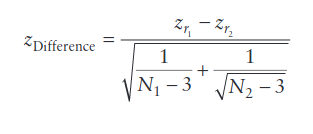

In [83]:
from IPython.display import Image
Image("independent_corr.png")

In [84]:
Z_diff = (Z_rmale-Z_rfemale)/np.sqrt((1/(len(data_male)-1))+((1/(len(data_female)-3))))
Z_diff

-0.7719525228355278

#### ii) Comparing Dependent rs

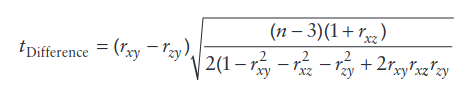

In [85]:
Image("dependent_corr.png")

P.239 of book  statistics with R

Chamorro-Premuzic, T., et al. (2008). Personality and Individual Differences, 44, 965–976

##### Why do you like your lectureurs

### Task 1

In [130]:



essay = pd.read_csv('essay.csv')
essay.head()

,essay,hours,grade
0,61.675497,10.630337,Upper Second Class
1,69.545006,7.285226,First Class
2,48.229304,5.052048,Third Class
3,70.678652,2.886614,First Class
4,59.899623,9.545012,Lower Second Class


In [131]:
essay.shape

(45, 3)

In [132]:
essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   essay   45 non-null     float64
 1   hours   45 non-null     float64
 2   grade   45 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [133]:
essay.corr()

,essay,hours
essay,1.000000,0.266684
hours,0.266684,1.000000


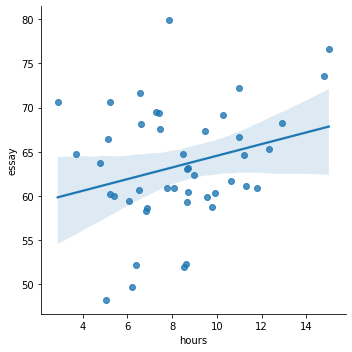

In [134]:
_ = sns.lmplot(data=essay, x='hours', y='essay')

In [135]:
st.shapiro(essay['hours'])

(0.981028139591217, 0.6615097522735596)

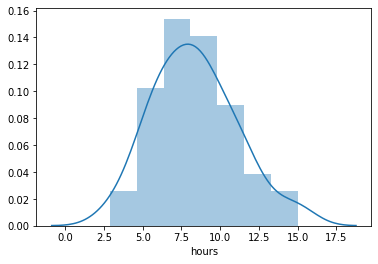

In [136]:
_ = sns.distplot(essay['hours'])

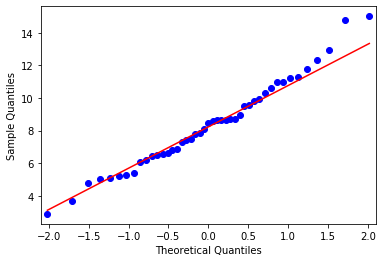

In [137]:
_ = sm.qqplot(essay['hours'],line='q')

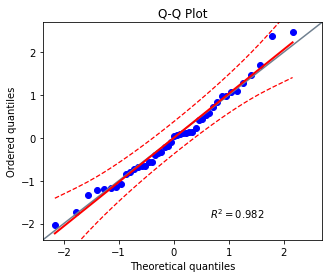

In [138]:
#using pingouin

_= pg.qqplot(essay['hours'])

In [139]:
r, p = st.pearsonr(essay['hours'], essay['essay'])
(r,p)

(0.26668374552723506, 0.07658508264530009)

In [140]:
# from above cell , for one tailed 
p_onetailed = p/2
p_onetailed

0.038292541322650045

Hence ,significant

In [141]:
essay['grade'].unique()

array(['Upper Second Class', 'First Class', 'Third Class',
       'Lower Second Class'], dtype=object)

In [142]:
grade_num={'First Class':1, 'Upper Second Class':2, 'Lower Second Class':3, 'Third Class':4}
essay['grade_num'] = essay['grade'].map(grade_num)
essay.head()

,essay,hours,grade,grade_num
0,61.675497,10.630337,Upper Second Class,2
1,69.545006,7.285226,First Class,1
2,48.229304,5.052048,Third Class,4
3,70.678652,2.886614,First Class,1
4,59.899623,9.545012,Lower Second Class,3


In [143]:
# now using grade 
st.spearmanr(essay['hours'], essay['grade_num'])

SpearmanrResult(correlation=-0.1930781010030226, pvalue=0.20381518662944526)

In [144]:
st.kendalltau(essay['hours'], essay['grade_num'])

KendalltauResult(correlation=-0.15755663209256654, pvalue=0.17836122458507397)

In both cases the correlation is non-significant. There was no significant relationship between degree grade classification for an essay and the time spent doing it, ρ = –.19, ns, and τ = –.16, ns. Note that the direction of the relationship has reversed. This has happened because the essay marks were recoded as 1 (first), 2 (upper second), 3 (lower second), and 4 (third), so high grades were represented by low numbers!This  illustrates  one  of  the  benefits  of not taking continuous data (like percentages) and transforming  them  into  categorical  data:  when  you  do,  you  lose  information  and  often statistical power! 

### Task 2

In [147]:
chick = pd.read_csv('ChickFlick.csv')
chick.head()

,gender,film,arousal
0,Male,Bridget Jones' Diary,22
1,Male,Bridget Jones' Diary,13
2,Male,Bridget Jones' Diary,16
3,Male,Bridget Jones' Diary,10
4,Male,Bridget Jones' Diary,18


In [148]:
gender_en = {"Male":1, "Female":2}
film_en = {"Bridget Jones' Diary":1, "Memento":2}

chick['gender_en'] = chick['gender'].map(gender_en)
chick['film_en'] = chick['film'].map(film_en)

In [149]:
chick.head()

,gender,film,arousal,gender_en,film_en
0,Male,Bridget Jones' Diary,22,1,1
1,Male,Bridget Jones' Diary,13,1,1
2,Male,Bridget Jones' Diary,16,1,1
3,Male,Bridget Jones' Diary,10,1,1
4,Male,Bridget Jones' Diary,18,1,1


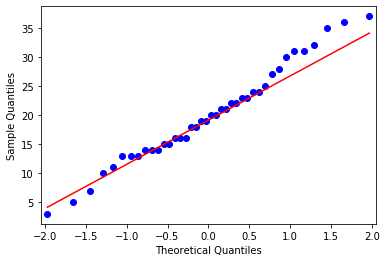

In [151]:
_ = sm.qqplot(chick['arousal'], line='q')

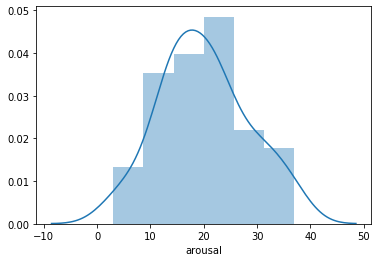

In [152]:
_ = sns.distplot(chick['arousal'])

In [153]:
st.shapiro(chick['arousal'])

(0.9800150394439697, 0.6901128888130188)

Since, we have dichotomous variables  , we need to calculate pointbiserial correlation

In [157]:
st.pointbiserialr(chick['gender_en'], chick['arousal'])

PointbiserialrResult(correlation=-0.18016716046145595, pvalue=0.2659326549161415)

In [158]:
st.pointbiserialr(chick['film_en'], chick['arousal'])

PointbiserialrResult(correlation=0.6382192633295642, pvalue=9.400044974654946e-06)

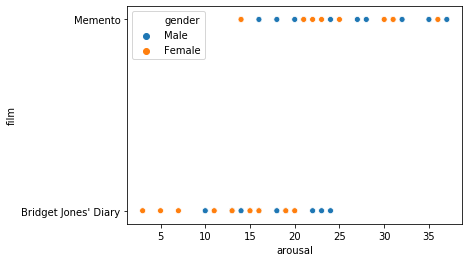

In [162]:
_ = sns.scatterplot(data=chick, x='arousal', y='film',hue='gender')

In  both  cases  I  used  a  two-tailed  test  because  no  prediction  was  made.  As  you  can  see,there  was  no  significant  relationship  between  gender  and  arousal, rpb = –.18, ns.  However, there  was  a  significant  relationship  between  the  film  watched  and  arousal, rpb = –.64, p < .001. Looking at how the groups were coded, you should see that Bridget Jones’s Diary had a code  of  1,  and Memento had a code of 2, therefore this result reflects the fact that as film goes  up  (changes  from  1  to  2)  arousal  goes  up.  Put  another  way,  as  the  film  changes  from Bridget Jones’s Diary to Memento, arousal increases. So, Memento gave rise to the greater arousal levels.

### Task 3

In [163]:
grade = pd.read_csv('grades.csv')

In [165]:
grade.head()

,stats,gcse
0,1,1
1,1,1
2,1,3
3,2,3
4,2,3


In [166]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stats   25 non-null     int64
 1   gcse    25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [167]:
grade.corr(method='spearman')

,stats,gcse
stats,1.000000,0.454602
gcse,0.454602,1.000000


In [169]:
st.spearmanr(grade['stats'], grade['gcse'])

SpearmanrResult(correlation=0.4546021025901462, pvalue=0.02242600579752975)

In [170]:
st.kendalltau(grade['stats'], grade['gcse'])

KendalltauResult(correlation=0.35396138961476464, pvalue=0.029300341614318604)